
<img style="float: right;" src="data/logo.png" width= "200" height = "200">

# Geopy - exploring geological data with Python

You have been in to the field and measured a conformable section of sedimentary rocks in the Peak District. You have collected:

* Bed thickness data 
* Grain size data
* Paleocurrent data
* Structural data

You have also collected oxygen isotope data that someone else measured from the same section last year Bloggs et al. 2020)

You are now dry and back at home, and you want to 1) inspect the data, 2) plot that data, 3) interpret the data.

### import packages

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet
import seaborn as sns
from scipy import stats
%config InlineBackend.figure_formats = ['svg']

### load data

In [115]:
log = pd.read_excel('data/data.xlsx')

In [116]:
log

,Unnamed: 0,bed,thickness,grainsize,paleocurrent,strike,dip,formation,d18O
0,0,1.00,8.72,0,310,NaN,NaN,Liverpool Formation,0.26
1,1,2.01,2.88,0,302,220.0,42.0,Liverpool Formation,0.31
2,2,3.02,8.46,0,301,NaN,NaN,Liverpool Formation,0.29
3,3,4.03,8.15,0,294,216.0,38.0,Liverpool Formation,0.27
4,4,5.04,4.80,0,285,NaN,NaN,Liverpool Formation,0.38
...,...,...,...,...,...,...,...,...,...
95,95,96.96,77.19,6,353,208.0,32.0,Manchester Formation,1.93
96,96,97.97,76.07,4,356,NaN,NaN,Manchester Formation,1.94
97,97,98.98,91.34,4,357,217.0,30.0,Manchester Formation,1.95
98,98,99.99,86.04,5,356,NaN,NaN,Manchester Formation,2.06


### describe data

In [93]:
log.describe()

,Unnamed: 0,bed,thickness,grainsize,paleocurrent,strike,dip
count,100.000000,100.000000,100.000000,100.000000,100.000000,50.00000,50.000000
mean,49.500000,51.000000,39.023900,2.860000,258.800000,224.88000,35.060000
std,29.011492,29.305959,32.189797,1.874981,117.364063,11.97044,3.340598
min,0.000000,1.000000,0.480000,0.000000,8.000000,197.00000,29.000000
25%,24.750000,25.997500,8.535000,1.000000,163.750000,217.25000,32.000000
50%,49.500000,51.000000,33.205000,3.500000,331.000000,225.50000,35.000000
75%,74.250000,76.002500,70.905000,5.000000,357.000000,233.00000,38.000000
max,99.000000,101.000000,91.340000,6.000000,363.000000,249.00000,42.000000


In [94]:
manchester = log[log['formation'] == 'Manchester Formation'] 
liverpool = log[log['formation'] == 'Liverpool Formation'] 

In [96]:
manchester.mean()

Unnamed: 0       74.5000
bed              76.2550
thickness        70.1066
grainsize         4.5800
paleocurrent    357.5000
strike          224.6800
dip              32.6800
dtype: float64

In [97]:
liverpool.mean()

Unnamed: 0       24.5000
bed              25.7450
thickness         7.9412
grainsize         1.1400
paleocurrent    160.1000
strike          225.0800
dip              37.4400
dtype: float64

### inspect data

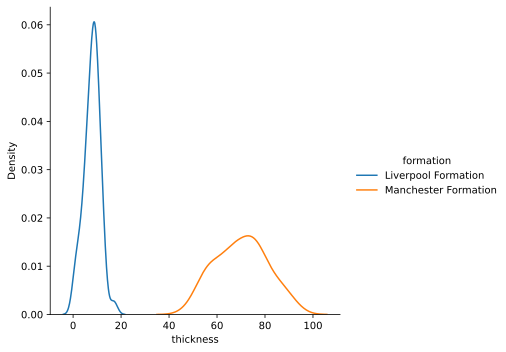

In [79]:
sns.displot(kind = 'kde', data = df, x = df.thickness, hue = df.formation)

KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29)

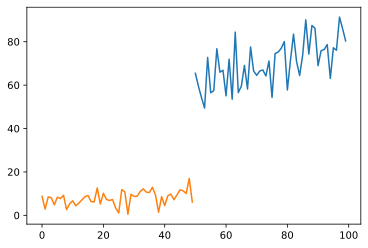

In [87]:
manchester = df[df['formation'] == 'Manchester Formation'] 
liverpool = df[df['formation'] == 'Liverpool Formation'] 

plt.plot(manchester.thickness)
plt.plot(liverpool.thickness)

stats.kstest(manchester.thickness, liverpool.thickness)

### plot data

Text(0.5, 0, 'bed thickness')

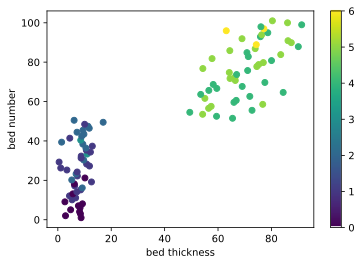

In [89]:
plt.scatter(df.thickness, df.bed, c = df.grainsize)
plt.colorbar()
plt.ylabel('bed number')
plt.xlabel('bed thickness')

In [ ]:
df.str.contai

## stereonet

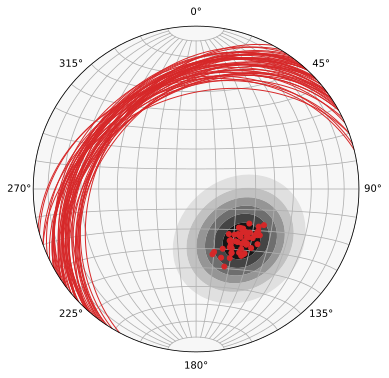

In [10]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='stereonet')

ax.plane(df.strike, df.dip, 'tab:red', linewidth = 1)
ax.pole(df.strike, df.dip, 'o', color = 'tab:red', markersize = 5)
ax.grid()

cax = ax.density_contourf(df.strike.dropna(), df.dip.dropna(), measurement='poles', cmap = 'Greys')

plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.thickness, df.bed)

rsq = round(r_value ** 2, 2)

plt.plot(df.thickness, df.bed, 'o')
plt.plot(df.thickness, (slope * df.thickness) + intercept, 'k', lw = 1)
plt.annotate(f'$R^2$ = {rsq}', (1, 90), fontsize = 15)